In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame

In [4]:
from scipy.stats import skew

In [5]:
from scipy.stats import zscore

In [36]:
df1 = sns.load_dataset('tips')

In [7]:
df1.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [6]:
df1['zscore'] = zscore(df1['total_bill'])

In [8]:
df1.head(2)

,total_bill,tip,sex,smoker,day,time,size,zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235


In [10]:
skew(df1['total_bill'])

1.1262346334818638

In [11]:
df1['total_bill'].skew()

1.1332130376158205

In [13]:
ser1 = Series(np.array([1,2,np.nan]),index=list('ABC'))
ser1

A    1.0
B    2.0
C    NaN
dtype: float64

In [20]:
# try methods to make a df

In [8]:
abc = DataFrame({'A':np.array([1,4,np.nan,np.nan]),
                   'B':np.array([2,5,7,np.nan]),
                    'C':np.array([3,np.nan,np.nan,np.nan])})
abc

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN
3,NaN,NaN,NaN


In [10]:
abc.isnull().sum()

A    2
B    1
C    3
dtype: int64

In [26]:
abc.dropna()

,A,B,C
0,1.0,2.0,3.0


In [12]:
abc.dropna(how='all')

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN


In [28]:
abc.dropna(axis=1)

""
0
1
2
3


In [11]:
abc.dropna(how='all',axis=1)

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN
3,NaN,NaN,NaN


In [30]:
abc.dropna(thresh=1)      #thresh means need atleast 1 non null value

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN


In [32]:
abc.dropna(thresh=2)              #thresh means need atleast 2 non null value

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN


In [36]:
abc.dropna(thresh=3)

,A,B,C
0,1.0,2.0,3.0


In [37]:
abc.dropna(thresh=2,axis=1)

,A,B
0,1.0,2.0
1,4.0,5.0
2,NaN,7.0
3,NaN,NaN


In [14]:
abc.dropna(inplace=True)

In [16]:
a = DataFrame({'A':np.array([1,4,np.nan,np.nan]),
                   'B':np.array([2,5,7,np.nan]),
                    'C':np.array([3,np.nan,np.nan,np.nan])})
a

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN
3,NaN,NaN,NaN


In [17]:
a['A']=a['A'].fillna(0)
a                                       #a['A'].fillna(0,inplace=True)

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,0.0,7.0,NaN
3,0.0,NaN,NaN


In [58]:
a.fillna(method='ffill')

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,3.0
2,0.0,7.0,3.0
3,0.0,7.0,3.0


In [60]:
a['B']=a['B'].fillna(a['B'].mean())
a

,A,B,C
0,1.0,2.000000,3.0
1,4.0,5.000000,NaN
2,0.0,7.000000,NaN
3,0.0,4.666667,NaN


# MULTI-VARIANT

In [18]:
df1 = sns.load_dataset('tips')
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


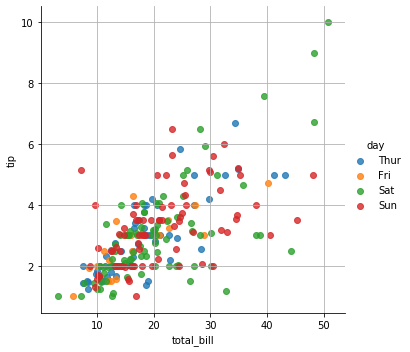

In [21]:
sns.lmplot(x='total_bill',y='tip',data=df1,fit_reg=False,hue='day')
plt.grid()
plt.show()

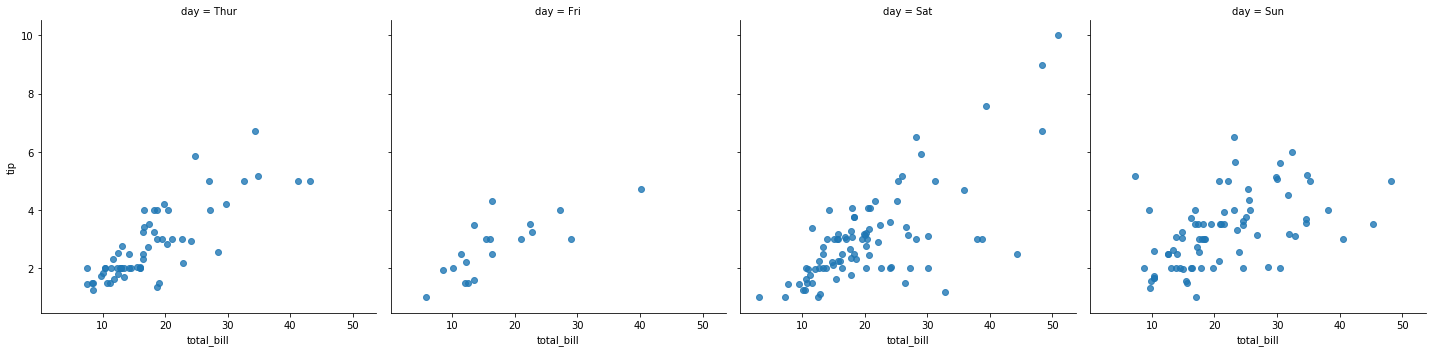

In [24]:
sns.lmplot(x='total_bill',y='tip',data=df1,fit_reg=False,col='day')
plt.show()

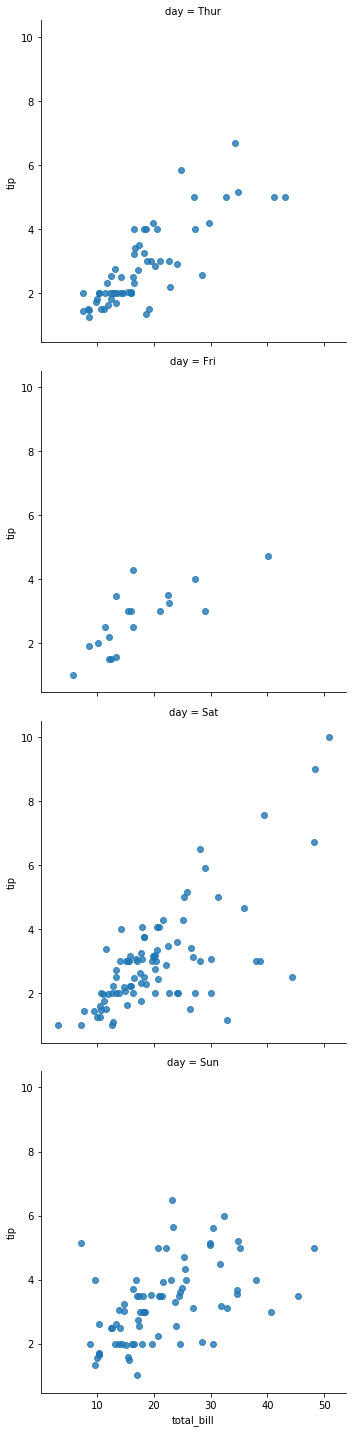

In [25]:
sns.lmplot(x='total_bill',y='tip',data=df1,fit_reg=False,row='day')
plt.show()

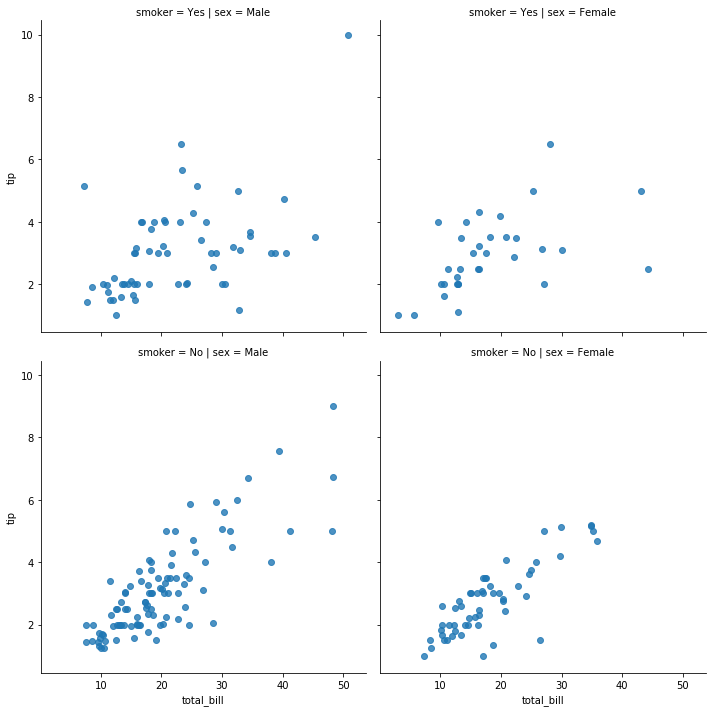

In [72]:
sns.lmplot(x='total_bill',y='tip',data=df1,fit_reg=False,col='sex',row='smoker')
plt.show()

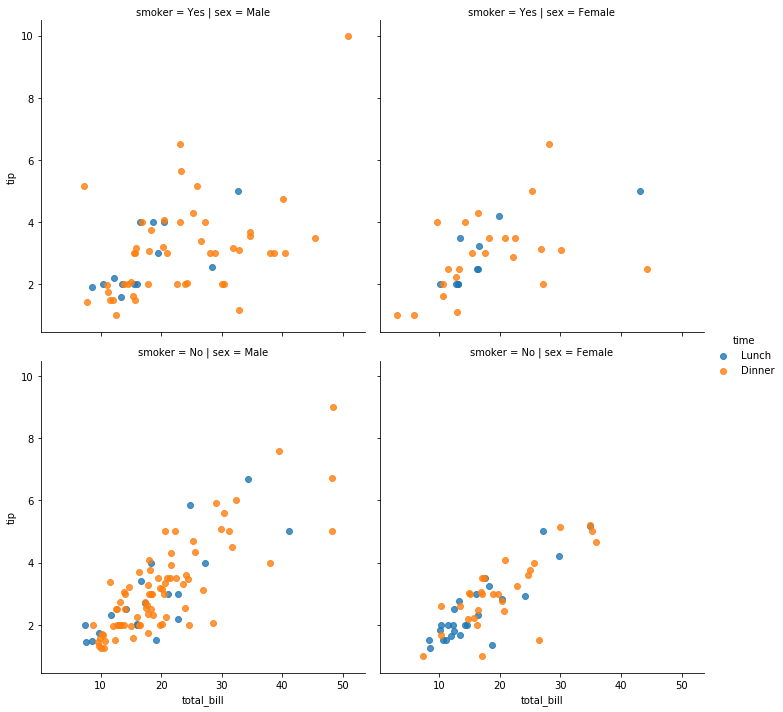

In [73]:
sns.lmplot(x='total_bill',y='tip',data=df1,fit_reg=False,col='sex',row='smoker',hue='time')
plt.show()

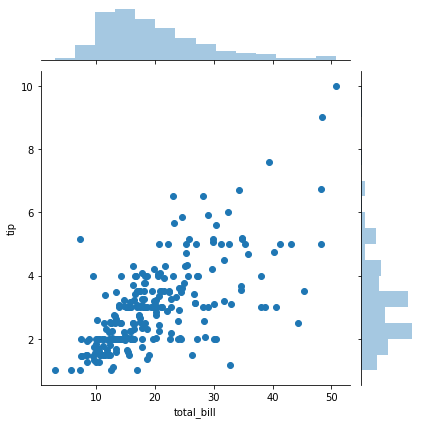

In [74]:
sns.jointplot(x='total_bill',y='tip',data=df1)
plt.show()

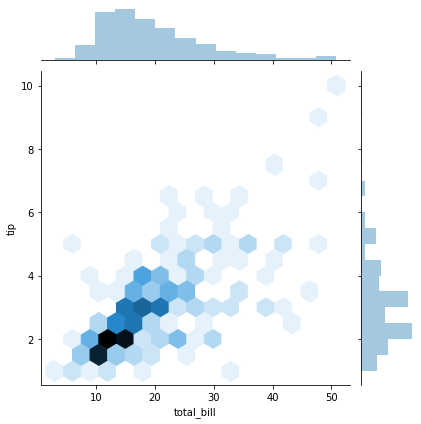

In [76]:
sns.jointplot(x='total_bill',y='tip',data=df1,kind='hex')     # kind=hex used to see where the data is densed
plt.show()

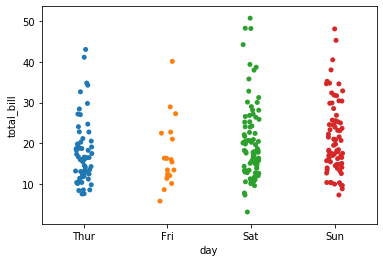

In [78]:
sns.stripplot(x='day',y='total_bill',data=df1)
plt.show()

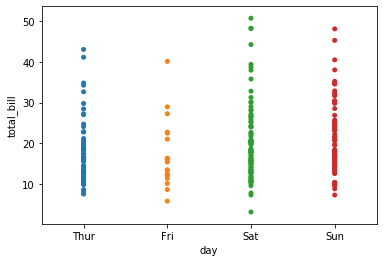

In [80]:
sns.stripplot(x='day',y='total_bill',data=df1,jitter=False)
plt.show()                                                     # jiter to make the strips thin

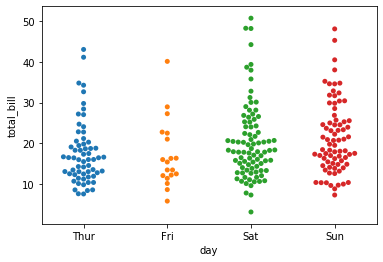

In [81]:
sns.swarmplot(x='day',y='total_bill',data=df1)
plt.show()

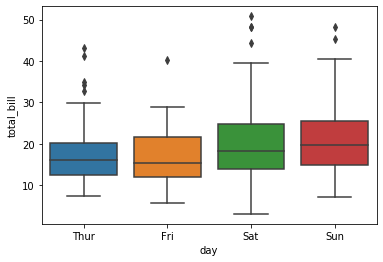

In [82]:
sns.boxplot(x='day',y='total_bill',data=df1)
plt.show()

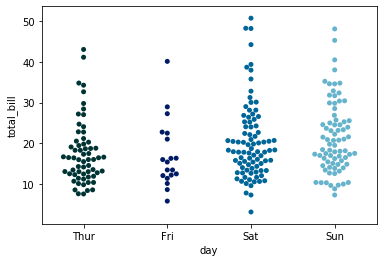

In [91]:
sns.swarmplot(x='day',y='total_bill',data=df1,palette='ocean')
plt.show()

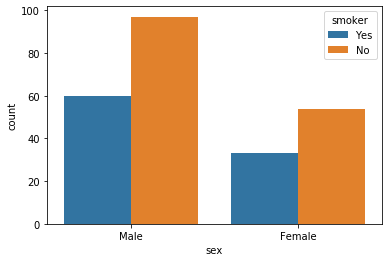

In [94]:
sns.countplot(x='sex',data=df1,hue='smoker')
plt.show()

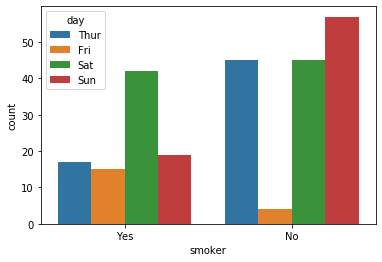

In [99]:
sns.countplot(x='smoker',data=df1,hue='day')
plt.show()

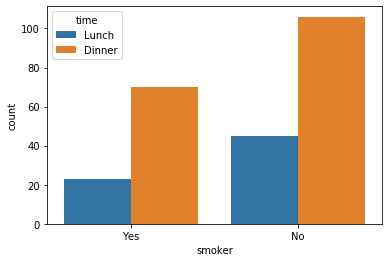

In [100]:
sns.countplot(x='smoker',data=df1,hue='time')
plt.show()

In [29]:
df1.groupby(['smoker','sex']).count()['size']

smoker  sex   
Yes     Male      60
        Female    33
No      Male      97
        Female    54
Name: size, dtype: int64

In [122]:
df1.groupby(['smoker','sex']).agg({'size':'count'})

size
smoker sex         
Yes    Male      60
       Female    33
No     Male      97
       Female    54

In [126]:
df1.groupby(['day','sex']).max()['tip']

day   sex   
Thur  Male       6.70
      Female     5.17
Fri   Male       4.73
      Female     4.30
Sat   Male      10.00
      Female     6.50
Sun   Male       6.50
      Female     5.20
Name: tip, dtype: float64

In [129]:
df1.pivot_table(index='sex',columns='smoker',values='size',aggfunc='count')

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [42]:
a=pd.crosstab(df1['sex'],df1['day'])
a

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


In [32]:
cor = df1[['total_bill','tip']].corr()

In [134]:
cor

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


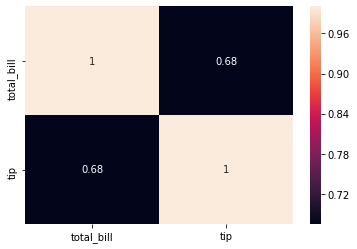

In [38]:
sns.heatmap(cor,annot=True)
plt.show()

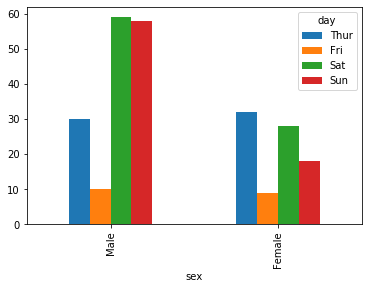

In [41]:
a.plot(kind='bar')

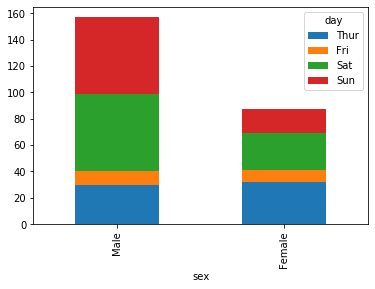

In [140]:
a.plot(kind='bar',stacked=True)
plt.show()

In [43]:
a = df1['sex'][df1['smoker']=='Yes'].value_counts()
b = df1['sex'][df1['smoker']=='No'].value_counts()

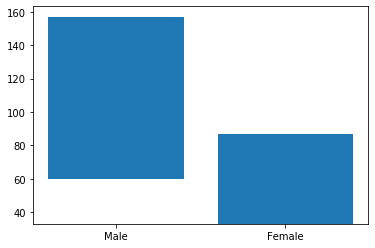

In [45]:
plt.bar(a.index,a.values)
plt.bar(b.index,b.values,bottom=a.values)
plt.show()

In [ ]:
plt.bar

In [47]:
dt = pd.read_csv('C:/Users/krishna/Downloads/master-1.csv')
dt.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [151]:
dt.shape

(27820, 12)

In [152]:
dt.size

333840

In [153]:
dt.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [154]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [157]:
dt.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [158]:
dt.dtypes.count()

12

In [183]:
def fun(dt):
    null=dt.isnull().sum()
    perc=(null/(dt.shape[0]))*100
    return(perc)
fun(dt)
    

country                0.000000
year                   0.000000
sex                    0.000000
age                    0.000000
suicides_no            0.000000
population             0.000000
suicides/100k pop      0.000000
country-year           0.000000
HDI for year          69.935298
 gdp_for_year ($)      0.000000
gdp_per_capita ($)     0.000000
generation             0.000000
dtype: float64

In [201]:
def fun(dt):
    null=dt.isnull().sum()
    perc=(null/dt.shape[0])*100
    d=pd.concat([null,perc],axis=1,keys=['null count','percentage'])
    return(d)
fun(dt)
    

,null count,percentage
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
HDI for year,19456,69.935298
gdp_for_year ($),0,0.000000


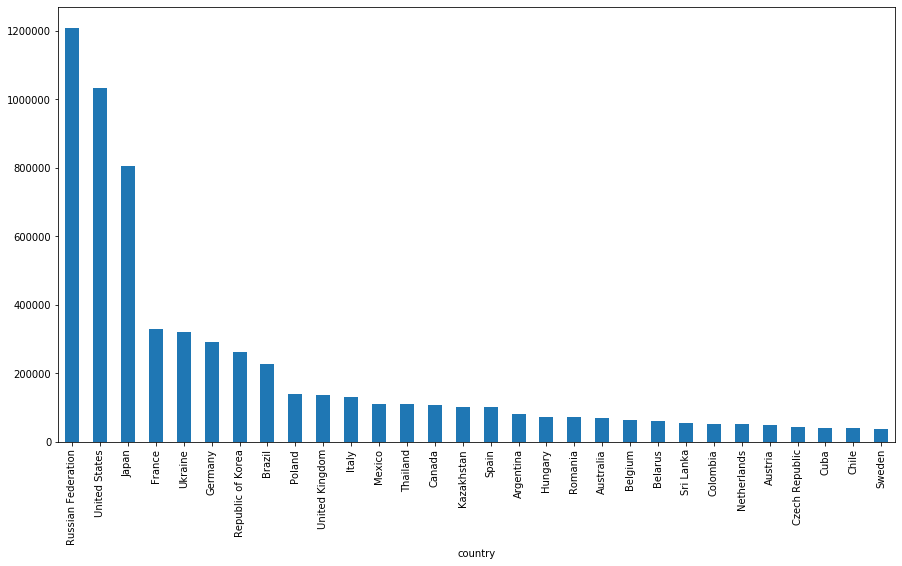

In [207]:
dt.groupby('country')['suicides_no'].sum().sort_values(ascending=False).head(30).plot(kind='bar',figsize=(15,8))
plt.show()

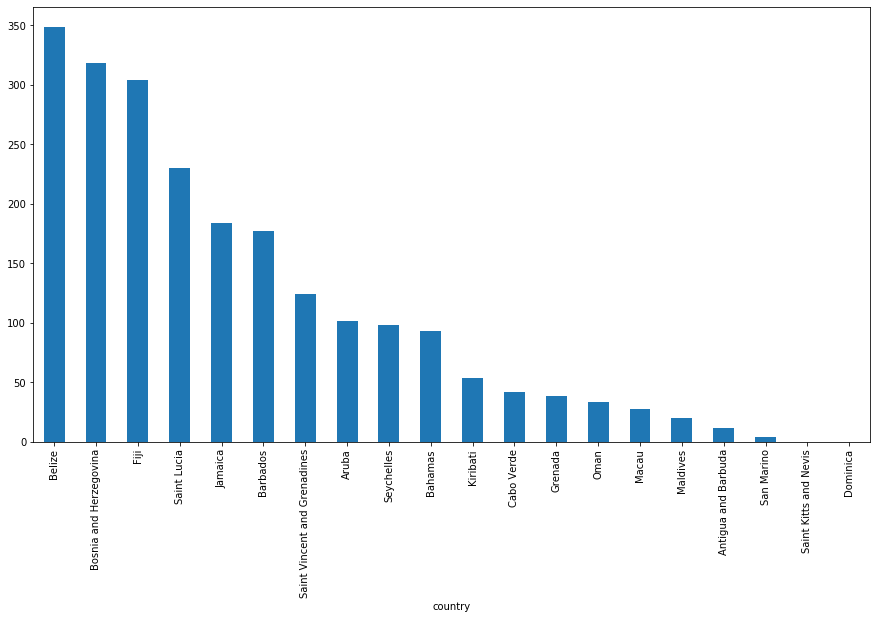

In [209]:
dt.groupby('country')['suicides_no'].sum().sort_values(ascending=False).tail(20).plot(kind='bar',figsize=(15,8))
plt.show()

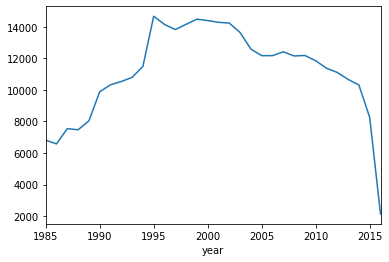

In [223]:
dt.groupby('year')['suicides/100k pop'].sum().plot(kind='line')
plt.show()

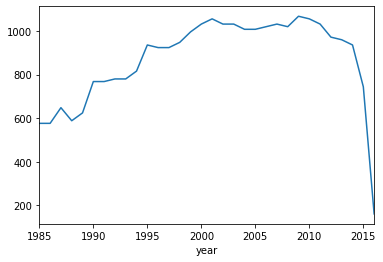

In [229]:
dt.groupby('year')['population'].count().plot(kind='line')
plt.show()

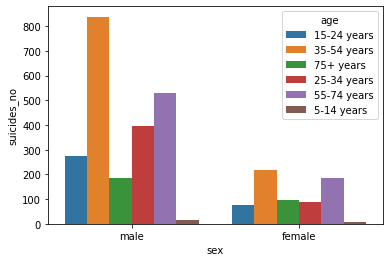

In [49]:
sns.barplot(x='sex',y='suicides_no',data=dt,hue='age',ci=0)
plt.show()

In [238]:
c=dt.corr()
c

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


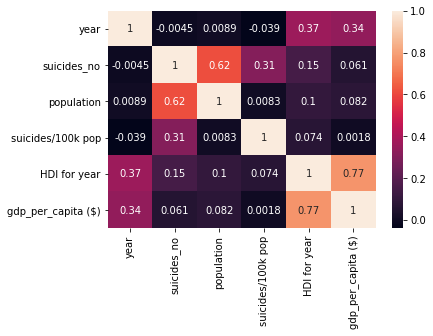

In [243]:
sns.heatmap(c,annot=True)
plt.show()